## Novel Corona virus Spread

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# import plotly.express as px
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
import calmap

In [5]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Javascript
from IPython.core.display import display, HTML

In [6]:
import json
import random
from urllib.request import urlopen

In [9]:
full_dataset = pd.read_csv("covid_19_data.csv", parse_dates=['ObservationDate'])

In [31]:
#pending cases are those which are not dead and not yet recovered
full_dataset['Pending'] = full_dataset['Confirmed'] - full_dataset['Deaths'] - full_dataset['Recovered']

In [32]:
full_dataset.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Pending
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0,1
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0,14
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,6
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0,1
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0,0


In [33]:
full_dataset.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     1815
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
Pending               0
dtype: int64

In [34]:
full_dataset.shape

(4935, 9)

## Analysis based on Country/Region 

In [35]:
country_data = full_dataset.groupby('Country/Region')['Confirmed','Deaths','Recovered','Pending'].sum().reset_index()

In [36]:
temp_c = country_data.sort_values(by='Confirmed',ascending=False)
temp_c = temp_c.reset_index(drop=True)
temp_c.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Pending
0,Mainland China,2554465,80616,961283,1512566
1,South Korea,80824,529,1496,78799
2,Italy,66824,3239,5454,58131
3,Iran,54206,1912,15142,37152
4,Others,17780,102,619,17059
5,France,9688,177,234,9277
6,Germany,8857,7,368,8482
7,Spain,7619,155,349,7115
8,Japan,7040,118,1034,5888
9,US,5505,176,174,5155


## Scatter Plot of Confirmed Cases vs Deaths in a country except china

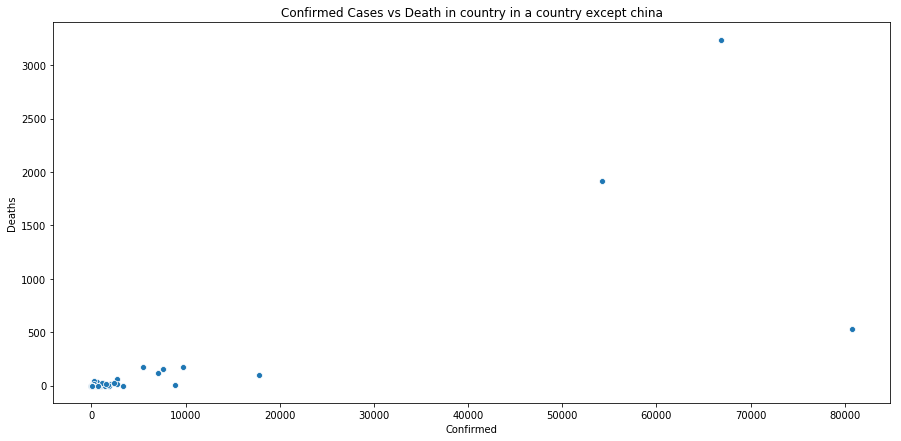

In [39]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Confirmed',y='Deaths',data=country_data[country_data['Country/Region'] != "Mainland China"])
plt.title("Confirmed Cases vs Death in country in a country except china")
plt.show()

## Confirmed cases of country with zero deaths

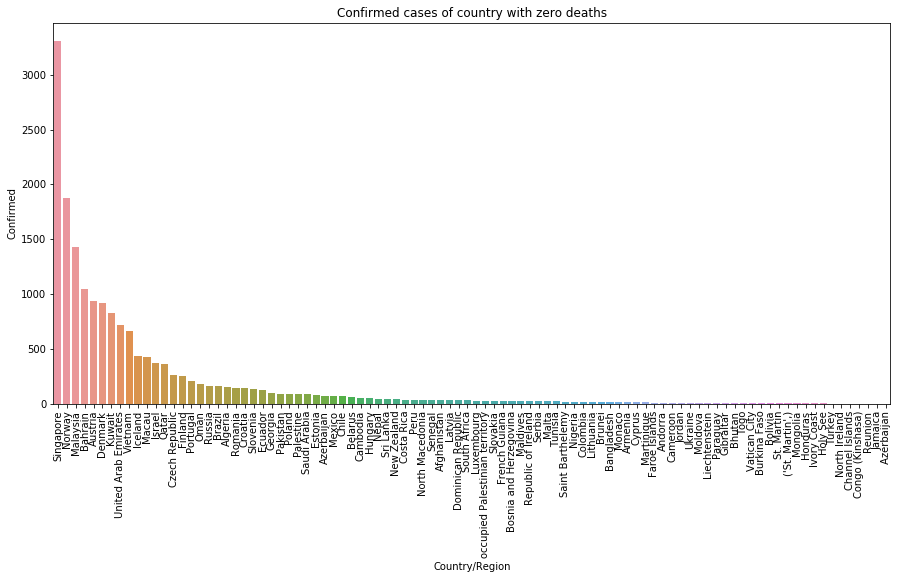

In [51]:
temp_a = country_data[country_data['Deaths'] == 0].sort_values(by="Confirmed",ascending=False)
plt.figure(figsize=(15,7))
ax=sns.barplot(x='Country/Region',y='Confirmed',data=temp_a)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Confirmed cases of country with zero deaths")
plt.show()

singapore has highest number of confirmed cases with no death

## Confimed cases with more than one death 

In [57]:
temp_b = country_data[country_data["Deaths"] != 0].sort_values(by="Confirmed").reset_index(drop=True)
temp_b.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Pending
0,Panama,9,1,0,8
1,Bulgaria,19,1,0,18
2,Morocco,21,2,0,19
3,Albania,24,1,0,23
4,Argentina,73,4,0,69
5,Indonesia,102,1,4,97
6,Ireland,170,1,0,169
7,Philippines,220,39,31,150
8,Egypt,280,4,50,226
9,San Marino,288,11,0,277


### country where all dies

In [59]:
temp_c = country_data[country_data["Confirmed"] == country_data["Deaths"]]
temp_c.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Pending


there are no country where all the confiemed cases died

###  death rate percentage in countries

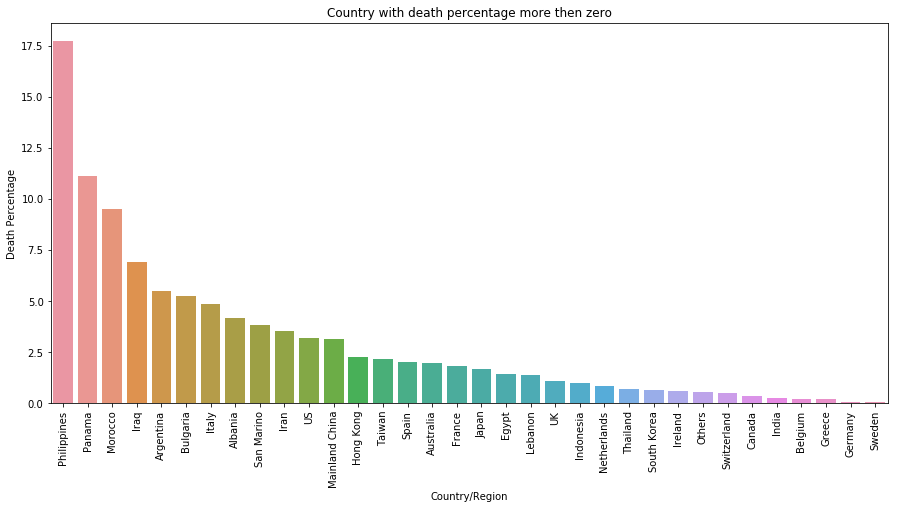

In [64]:
temp_d = country_data.copy()
temp_d["Death Percentage"] = (country_data["Deaths"]*100)/(country_data["Confirmed"])
temp_d = temp_d.sort_values(by='Death Percentage',ascending=False).reset_index(drop=True)
temp_d = temp_d[temp_d["Death Percentage"]>0]
plt.figure(figsize=(15,7))
ax=sns.barplot(x='Country/Region',y='Death Percentage',data=temp_d)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Country with death percentage more then zero")
plt.show()